In [149]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  


# csv 형식으로 된 데이터 파일을 읽어옵니다. 
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000


In [1]:
import torch
torch.__version__

'1.9.0.post2'

# 1. 타겟 변수 분석

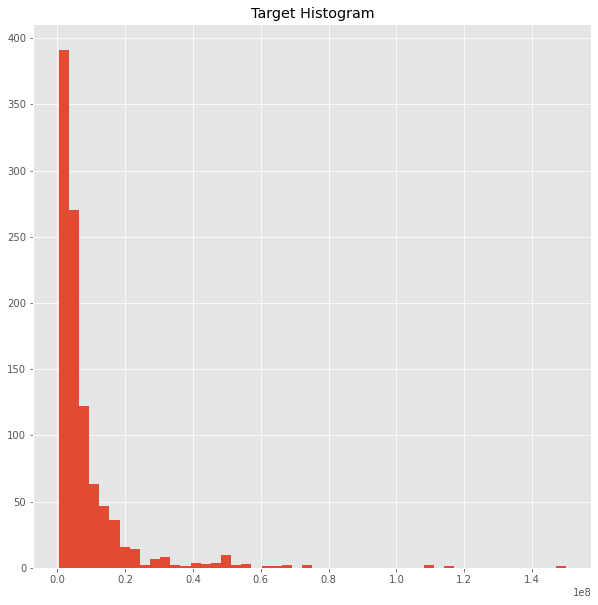

In [150]:
plt.figure(figsize=(10,10))
plt.hist(train['target'], bins=50)
plt.title('Target Histogram')
plt.show()

타겟(중고차 가격)의 분포를 살펴봅니다.

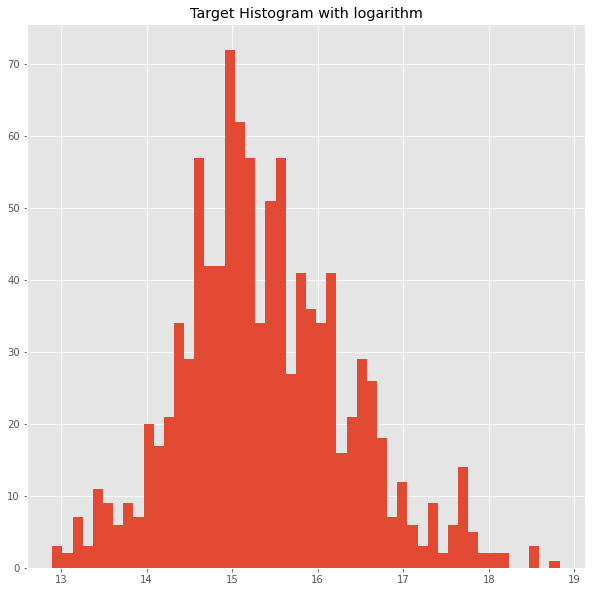

In [151]:
log_target = np.log(train['target'])

plt.figure(figsize=(10,10))
plt.hist(log_target, bins=50)
plt.title('Target Histogram with logarithm')
plt.show()

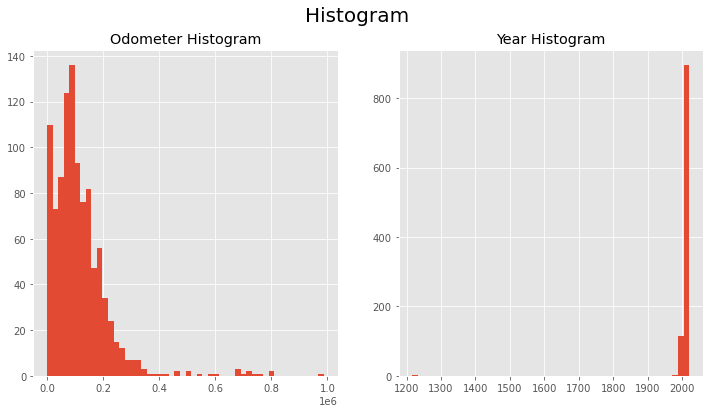

In [152]:
plt.style.use("ggplot")

plt.figure(figsize=(12,6))
plt.suptitle("Histogram", fontsize=20)

plt.subplot(1,2,1)
plt.hist(train.odometer, bins=50)
plt.title('Odometer Histogram')

plt.subplot(1,2,2)
plt.hist(train.year, bins=50)
plt.title('Year Histogram')
plt.show()

/var/folders/f_/8q99w4md3hb8qbyr7lt7v7r00000gn/T/ipykernel_18558/3991878502.py:2: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



Text(0.5, 0, 'target')

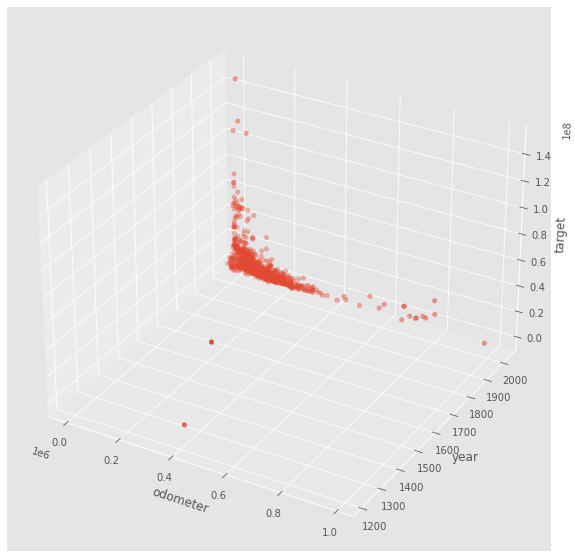

In [153]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection = '3d')

X = train.odometer
Y = train.year
Z = train.target

ax.scatter(X,Y,Z)
ax.set_xlabel('odometer')
ax.set_ylabel('year')
ax.set_zlabel('target')

/var/folders/f_/8q99w4md3hb8qbyr7lt7v7r00000gn/T/ipykernel_18558/84867182.py:2: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



Text(0.5, 0, 'target')

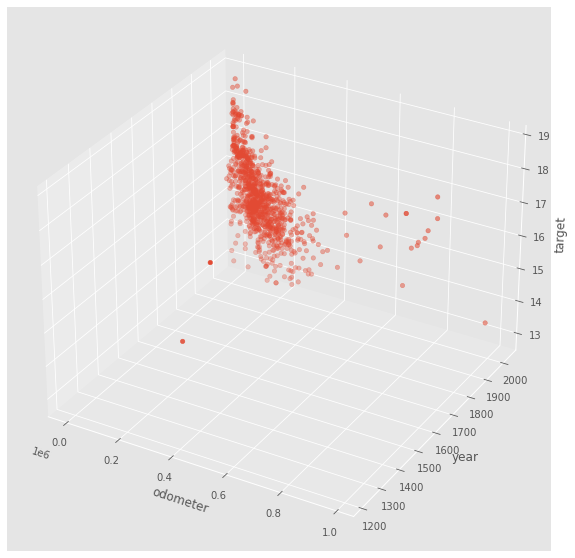

In [154]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection = '3d')

X = train.odometer
Y = train.year
Z = np.log(train.target)

ax.scatter(X,Y,Z)
ax.set_xlabel('odometer')
ax.set_ylabel('year')
ax.set_zlabel('target')

In [155]:
train[train['year'] < 1900]

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
415,415,Mercedes-Benz ATEGO,403461,Lagos,Locally used,4-cylinder(I4),manual,diesel,white,1218,6015000
827,827,Mercedes-Benz/52,510053,Lagos,Locally used,6-cylinder(V6),manual,diesel,white,1217,75015000


In [156]:
train = train[train['year'] > 1900]
train.shape

(1013, 11)

In [157]:
train = train.drop('id', axis = 1).reset_index().drop('index', axis = 1).reset_index().rename({'index':'id'}, axis = 'columns')

In [158]:
train

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000
...,...,...,...,...,...,...,...,...,...,...,...
1008,1008,Toyota Corolla,46768,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2014,5415000
1009,1009,Toyota Camry,31600,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,Silver,2011,3615000
1010,1010,Toyota Camry,96802,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2011,3415000
1011,1011,Lexus GX 460,146275,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Gold,2013,14315000


/var/folders/f_/8q99w4md3hb8qbyr7lt7v7r00000gn/T/ipykernel_18558/3991878502.py:2: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



Text(0.5, 0, 'target')

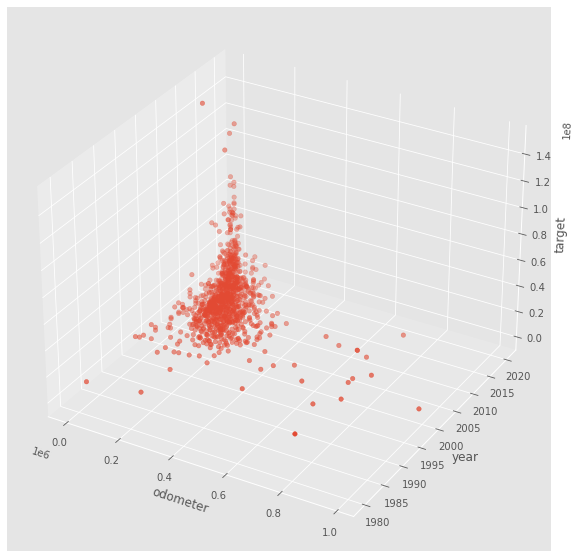

In [159]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection = '3d')

X = train.odometer
Y = train.year
Z = train.target

ax.scatter(X,Y,Z)
ax.set_xlabel('odometer')
ax.set_ylabel('year')
ax.set_zlabel('target')

/var/folders/f_/8q99w4md3hb8qbyr7lt7v7r00000gn/T/ipykernel_18558/84867182.py:2: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



Text(0.5, 0, 'target')

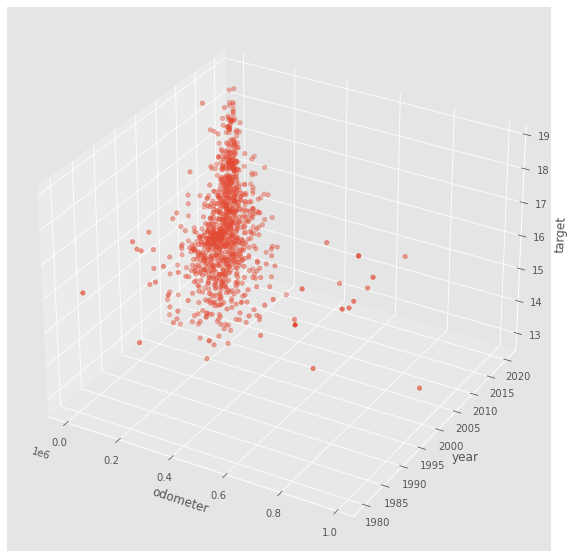

In [160]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection = '3d')

X = train.odometer
Y = train.year
Z = np.log(train.target)

ax.scatter(X,Y,Z)
ax.set_xlabel('odometer')
ax.set_ylabel('year')
ax.set_zlabel('target')

In [161]:
import plotly.express as px

fig = px.scatter_3d(train, x = 'odometer', y = 'year', z = 'target')
fig.update_traces(marker_size = 2)
fig.show()

In [162]:
data_description = train.describe().iloc[:,1:3]
data_description

,odometer,year
count,1013.000000,1013.000000
mean,116171.015795,2009.946693
std,104147.052690,5.540466
min,0.000000,1980.000000
25%,55775.000000,2006.000000
50%,94803.000000,2010.000000
75%,152878.000000,2014.000000
max,987322.000000,2020.000000


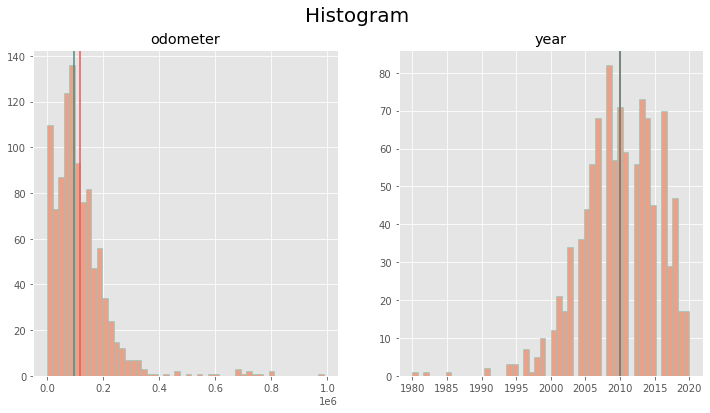

In [163]:
plt.style.use("ggplot")

plt.figure(figsize=(12,6))
plt.suptitle("Histogram", fontsize=20)

plt.subplot(1,2,1)
plt.hist(train['odometer'], bins=50, color='#eaa18a', edgecolor='#7bcabf')
plt.title('odometer')
plt.axvline(data_description['odometer']['mean'], c='#f55354', label = f"mean = {round(data_description['odometer']['mean'], 2)}")
plt.axvline(data_description['odometer']['50%'], c='#518d7d', label = f"median = {round(data_description['odometer']['50%'], 2)}")

plt.subplot(1,2,2)
# 수치형 데이터 통계치 그래프
plt.hist(train['year'], bins = 50, color='#eaa18a', edgecolor='#7bcabf')
plt.title('year')
plt.axvline(data_description['year']['mean'], c='#f55354', label = f"mean = {round(data_description['year']['mean'], 2)}")
plt.axvline(data_description['year']['50%'], c='#518d7d', label = f"median = {round(data_description['year']['50%'], 2)}")


In [164]:
from sklearn.preprocessing import MinMaxScaler

# 수치형 데이터 상관관계 히트맵 시각화
train_corr = train[['odometer', 'year', 'target']]
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

/var/folders/f_/8q99w4md3hb8qbyr7lt7v7r00000gn/T/ipykernel_18558/1291718098.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Correlation between features')

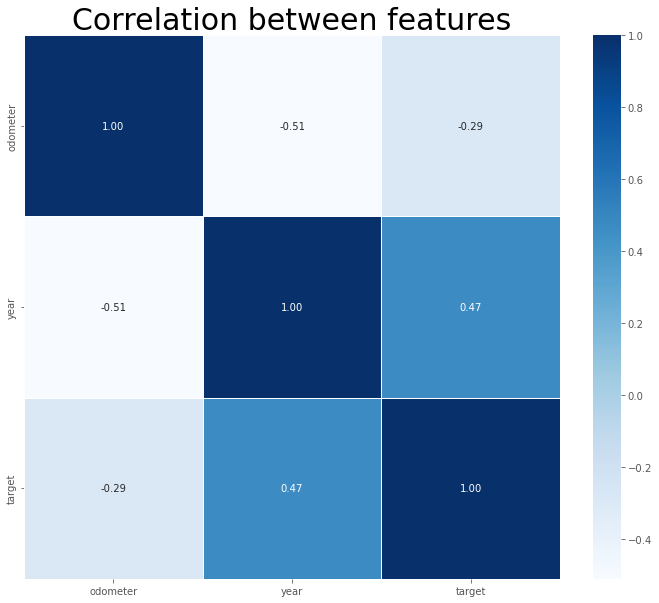

In [165]:
plt.figure(figsize=(12,10))
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation between features', fontsize=30)

In [166]:
# Target과 피쳐들의 상관관계
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['target'].sort_values(ascending=False), columns=['target'])
df_temp28.style.background_gradient(cmap='viridis')

,target
target,1.000000
year,0.468276
odometer,-0.287731


In [167]:
train_corr

,odometer,year,target
0,0.018512,0.900,0.088661
1,0.000010,0.975,0.217993
2,0.084158,0.800,0.063597
3,0.092699,0.675,0.022825
4,0.095386,0.750,0.046686
...,...,...,...
1008,0.047369,0.850,0.033519
1009,0.032006,0.775,0.021488
1010,0.098045,0.775,0.020152
1011,0.148153,0.825,0.093005


In [168]:
train.target

0       13665000
1       33015000
2        9915000
3        3815000
4        7385000
          ...   
1008     5415000
1009     3615000
1010     3415000
1011    14315000
1012    10015000
Name: target, Length: 1013, dtype: int64

/var/folders/f_/8q99w4md3hb8qbyr7lt7v7r00000gn/T/ipykernel_18558/436810653.py:2: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



Text(0.5, 0, 'target')

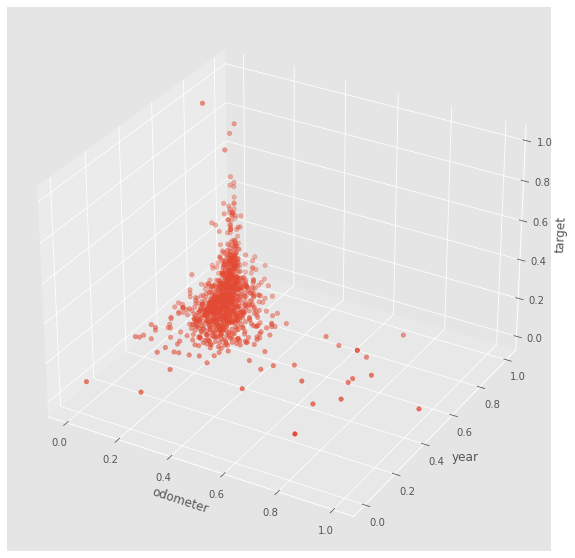

In [169]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection = '3d')

X = train_corr.odometer
Y = train_corr.year
Z = train_corr.target

ax.scatter(X,Y,Z)
ax.set_xlabel('odometer')
ax.set_ylabel('year')
ax.set_zlabel('target')

/var/folders/f_/8q99w4md3hb8qbyr7lt7v7r00000gn/T/ipykernel_18558/3407204229.py:2: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().

/Users/shlee/miniforge3/envs/tf_25/lib/python3.8/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning:

divide by zero encountered in log



Text(0.5, 0, 'target')

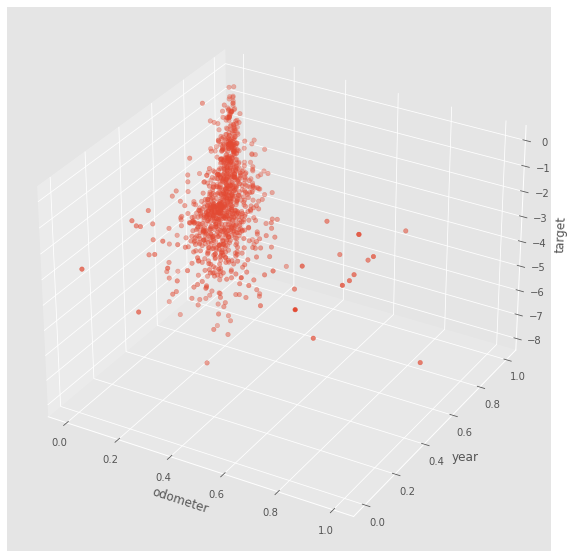

In [170]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection = '3d')

X = train_corr.odometer
Y = train_corr.year
Z = np.log(train_corr).target

ax.scatter(X,Y,Z)
ax.set_xlabel('odometer')
ax.set_ylabel('year')
ax.set_zlabel('target')

In [171]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

k=20 일때가 제일 좋음

In [172]:
train.describe(include="object")

,title,location,isimported,engine,transmission,fuel,paint
count,1013,1013,1013,1013,1013,1013,1013
unique,201,13,3,8,2,2,76
top,Toyota Camry,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black
freq,129,790,744,617,965,970,292


In [173]:
train['title'].value_counts()[:20]

Toyota Camry            129
Toyota Corolla          108
Toyota Highlander        50
Toyota Sienna            49
Toyota RAV 4             40
Honda Accord             38
Lexus RX 350             33
Lexus ES 350             24
Toyota Venza             16
Lexus GX 460             16
Honda Pilot              15
Lexus LX 570             14
Mercedes-Benz ML 350     13
Toyota Avalon            13
Mercedes-Benz GL 450     12
Toyota Matrix            12
Toyota Tacoma            12
Ford Explorer            12
Mercedes-Benz E 350      12
Toyota 4-Runner          12
Name: title, dtype: int64

In [174]:
train['brand'] = train['title'].apply(lambda x : x.split(" ")[0])
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000,Toyota
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000,Toyota
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000,Land
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000,Lexus
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000,Toyota


In [175]:
train['brand'].value_counts().head()

Toyota           474
Lexus            122
Mercedes-Benz    104
Honda             81
Ford              36
Name: brand, dtype: int64

In [176]:
print('title의 unique 카테고리 개수 : ', len(train['title'].value_counts()))
print('brand의 unique 카테고리 개수 : ', len(train['brand'].value_counts()))

title의 unique 카테고리 개수 :  201
brand의 unique 카테고리 개수 :  41


In [177]:
train['paint'].value_counts()[:20]

Black        292
White        115
Silver       103
Grey          84
Blue          70
Red           53
Dark Grey     47
Gold          37
white         24
Green         18
Gray          17
Brown         16
Black         15
Dark Blue     14
Wine           8
Silver         5
Sliver         5
blue           5
red            5
Grey           3
Name: paint, dtype: int64

In [178]:
import re 

def clean_text(texts): 
    corpus = [] 
    for i in range(0, len(texts)): 
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>\<]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
        review = re.sub(r'\d+','',review)#숫자 제거
        review = review.lower() #소문자 변환
        review = re.sub(r'\s+', ' ', review) #extra space 제거
        review = re.sub(r'<[^>]+>','',review) #Html tags 제거
        review = re.sub(r'\s+', ' ', review) #spaces 제거
        review = re.sub(r"^\s+", '', review) #space from start 제거
        review = re.sub(r'\s+$', '', review) #space from the end 제거
        review = re.sub(r'_', ' ', review) #space from the end 제거
        #review = re.sub(r'l', '', review)
        corpus.append(review) 
        
    return corpus


In [179]:
temp = clean_text(train['paint']) #메소드 적용
train['paint'] = temp

In [180]:
print('brand의 unique 카테고리 개수 : ', len(train['paint'].unique()))

brand의 unique 카테고리 개수 :  51


In [181]:
train['paint'].value_counts()[:20]

black        310
white        142
silver       109
grey          87
blue          78
red           58
dark grey     48
gold          41
green         20
gray          18
dark blue     17
brown         16
wine           9
sliver         5
dark ash       4
cream          4
ash            3
purple         3
yellow         3
whiteblue      2
Name: paint, dtype: int64

In [182]:
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)

In [183]:
train['paint'].value_counts()

black     312
grey      159
white     146
silver    117
blue      105
red        60
gold       42
green      21
brown      17
wine       10
ash         8
cream       4
purple      3
yellow      3
milk        2
maroon      2
beige       1
orange      1
Name: paint, dtype: int64

In [184]:
print('paint의 unique 카테고리 개수 : ', len(train['paint'].value_counts()))

paint의 unique 카테고리 개수 :  18


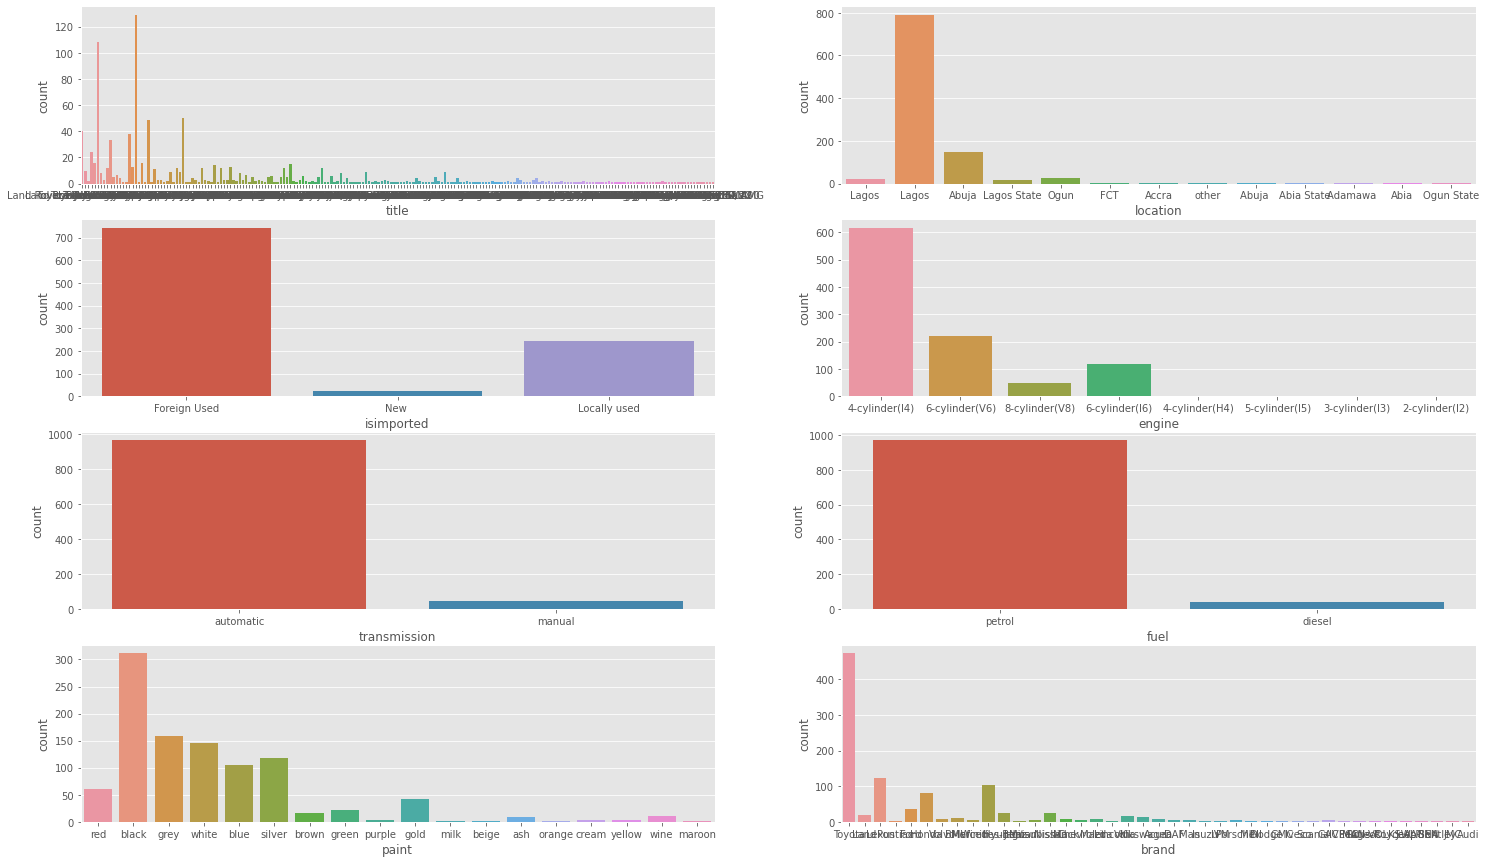

In [185]:
plt.style.use("ggplot")

plt.figure(figsize=(25,15))
count = 1

for i in train.describe(include="object").columns:
    plt.subplot(4,2,count)
    # countplot 을 사용해서 데이터의 분포를 살펴봅니다.
    sns.countplot(data=train, x=i)
    count += 1

In [186]:
train

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,red,2016,13665000,Toyota
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,black,2019,33015000,Toyota
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,red,2012,9915000,Land
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,grey,2007,3815000,Lexus
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,red,2010,7385000,Toyota
...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1008,Toyota Corolla,46768,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,black,2014,5415000,Toyota
1009,1009,Toyota Camry,31600,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,silver,2011,3615000,Toyota
1010,1010,Toyota Camry,96802,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,black,2011,3415000,Toyota
1011,1011,Lexus GX 460,146275,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,gold,2013,14315000,Lexus


# 모델 학습

In [187]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rf_reg = RandomForestRegressor()
gd_reg = GradientBoostingRegressor()

In [188]:
#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i+1  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    print(label_maps)
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

le = make_label_map(train)
train = label_encoder(train, le)
train.head()

{'title': {'unknown': 0, 'Toyota RAV 4': 1, 'Toyota Land Cruiser': 2, 'Land Rover Range Rover Evoque': 3, 'Lexus ES 350': 4, 'Toyota Venza': 5, 'Toyota Corolla': 6, 'Land Rover Range Rover Sport': 7, 'Pontiac Vibe': 8, 'Toyota Tacoma': 9, 'Lexus RX 350': 10, 'Ford Escape': 11, 'Honda Civic': 12, 'Volvo XC90': 13, 'BMW 750': 14, 'Infiniti JX': 15, 'Honda Accord': 16, 'Mercedes-Benz ML 350': 17, 'Toyota Camry': 18, 'Hyundai Azera': 19, 'Lexus GX 460': 20, 'BMW 325': 21, 'Toyota Sienna': 22, 'Honda Fit': 23, 'Honda CR-V': 24, 'Hyundai Tucson': 25, 'Ford Transit': 26, 'Jaguar XJ8': 27, 'BMW X6': 28, 'Mercedes-Benz C 300': 29, 'Mitsubishi Galant': 30, 'Mercedes-Benz GL 450': 31, 'Lexus RX 300': 32, 'Toyota Highlander': 33, 'Mitsubishi CANTER PICK UP': 34, 'Nissan Titan': 35, 'Lexus IS 250': 36, 'Mercedes-Benz 200': 37, 'Toyota Sequoia': 38, 'Ford Explorer': 39, 'Hyundai ix35': 40, 'Mack CH613 CONVENTIONAL CAB': 41, 'Lexus CT 200h': 42, 'Lexus LX 570': 43, 'Toyota Avensis': 44, 'Toyota 4-Run

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,1,18277,1,1,1,1,1,1,2016,13665000,1
1,1,2,10,2,2,1,1,1,2,2019,33015000,1
2,2,3,83091,2,1,2,1,1,1,2012,9915000,2
3,3,4,91524,2,1,1,1,1,3,2007,3815000,3
4,4,5,94177,2,1,2,1,1,1,2010,7385000,1


In [189]:
X_train = train.drop(['id', 'target'], axis = 1) #training 데이터에서 피쳐 추출
y_train = train.target #training 데이터에서 중고차 가격 추출
y_log_train = np.log(train.target)

In [190]:
X_train

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
0,1,18277,1,1,1,1,1,1,2016,1
1,2,10,2,2,1,1,1,2,2019,1
2,3,83091,2,1,2,1,1,1,2012,2
3,4,91524,2,1,1,1,1,3,2007,3
4,5,94177,2,1,2,1,1,1,2010,1
...,...,...,...,...,...,...,...,...,...,...
1008,6,46768,2,1,1,1,1,2,2014,1
1009,18,31600,3,1,1,1,1,6,2011,1
1010,18,96802,3,1,1,1,1,2,2011,1
1011,20,146275,2,1,2,1,1,10,2013,3


In [214]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# np.random.randint(6)


param_distribs = {
        'n_estimators': randint(low=1, high=200),   # 1~200까지의 정수를 랜덤하게 뽑는 분포 # 
        'max_features': randint(low=1, high=10),     # 1~8 까지의 정수를 랜덤하게 뽑는 분포
    }

# RF 모델의 두 파라미터 'n_estimators'와 'max_features'의 값들을 특정 분포에서 꺼내와 테스트


forest_reg = RandomForestRegressor()
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)
# 5-fold cv로 10번 수행함.
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x16cd83a30>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x16cd837c0>},
                   random_state=42, scoring='neg_mean_absolute_error')

In [225]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# np.random.randint(6)


param_distribs = {
        'n_estimators': randint(low=1, high=200),   # 1~200까지의 정수를 랜덤하게 뽑는 분포 # 
        'max_features': randint(low=1, high=11),     # 1~8 까지의 정수를 랜덤하게 뽑는 분포
    }

# RF 모델의 두 파라미터 'n_estimators'와 'max_features'의 값들을 특정 분포에서 꺼내와 테스트


forest_reg = RandomForestRegressor()
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)
# 5-fold cv로 10번 수행함.
rnd_search.fit(X_train, y_log_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x16cdb1f40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x16cdfe250>},
                   random_state=42, scoring='neg_mean_absolute_error')

In [226]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.5243200958305517 {'max_features': 7, 'n_estimators': 180}
0.5249780402696762 {'max_features': 8, 'n_estimators': 189}
0.5302375405927627 {'max_features': 5, 'n_estimators': 103}
0.5290970851012711 {'max_features': 10, 'n_estimators': 75}
0.5266222746414077 {'max_features': 8, 'n_estimators': 117}
0.5302856866946614 {'max_features': 4, 'n_estimators': 104}
0.5255048366995041 {'max_features': 8, 'n_estimators': 131}
0.5303814071092203 {'max_features': 6, 'n_estimators': 53}
0.5368620607517965 {'max_features': 2, 'n_estimators': 88}
0.5270685307502833 {'max_features': 6, 'n_estimators': 130}


In [227]:
print(rnd_search.best_params_)
print(rnd_search.best_estimator_)

{'max_features': 7, 'n_estimators': 180}
RandomForestRegressor(max_features=7, n_estimators=180)


In [229]:
rnd_reg = RandomForestRegressor(max_features=7, n_estimators=180)


In [195]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rnd_reg, X_train, y_log_train,
													scoring="neg_mean_absolute_error", cv=10)

# cross-validation에서는 결과로 클수록 좋은 효용 함수를 기대합니다.
# MSE의 음수값을 계산하는 neg_mean_squared_error 함수로부터 scores가 도출됩니다.
# 그래서, 제곱근을 계산하기 전에 음수인 scores의 부호를 양수로 바꾸어주는 과정이 필요합니다.

rnd_rmae_scores = np.sqrt(-scores)


# score 값을 출력하기 위한 과정을 정형화하여 함수를 정의합니다.
def display_scores(scores):
		print("점수: ", scores)
		print("평균: ", scores.mean())
		print("표준편차: ", scores.std())



In [197]:
display_scores(np.exp(rnd_rmae_scores))

점수:  [1.60169412 1.68473229 1.62369899 1.73719866 1.68273746 1.79180085
 1.66066966 1.77535489 1.63848281 1.75403916]
평균:  1.6950408892312008
표준편차:  0.06285859375938035


In [198]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


In [203]:
check_missing_col(test) # 결측치 확인
test = pd.read_csv('data/test.csv')
test = test.drop('id', axis = 1) #분석에 필요없는 열 삭제
test['brand'] = test['title'].apply(lambda x : x.split(" ")[0])


결측치가 존재하지 않습니다


In [205]:
temp = clean_text(test['paint']) #메소드 적용
test['paint'] = temp

In [206]:
test

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
0,Mercedes-Benz C 300,1234,Abuja,New,4-cylinder(I4),automatic,petrol,white,2017,Mercedes-Benz
1,Honda Accord,29938,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,white,2013,Honda
2,Mercedes-Benz S 550,87501,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,black,2012,Mercedes-Benz
3,Toyota Sienna,180894,Lagos,Locally used,6-cylinder(V6),automatic,petrol,dark grey,2001,Toyota
4,Toyota Hiace,104814,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,white,2000,Toyota
...,...,...,...,...,...,...,...,...,...,...
431,Mercedes-Benz GLK 350,78175,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,dark blue,2014,Mercedes-Benz
432,Honda Crosstour,129223,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,red,2011,Honda
433,Mercedes-Benz ML 350,100943,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,black,2013,Mercedes-Benz
434,Lexus GX 470,81463,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,mint green,2003,Lexus


In [207]:

test = label_encoder(test, le) #범주형 피쳐 라벨인코딩

test.head()

,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
0,29.0,1234,3.0,2,1.0,1,1,4.0,2017,10.0
1,16.0,29938,3.0,1,1.0,1,1,4.0,2013,6.0
2,0.0,87501,2.0,1,1.0,1,1,2.0,2012,10.0
3,22.0,180894,2.0,3,2.0,1,1,0.0,2001,1.0
4,85.0,104814,2.0,1,1.0,1,1,4.0,2000,1.0


In [234]:
rnd_reg.fit(X_train, y_log_train)

RandomForestRegressor(max_features=7, n_estimators=180)

In [221]:
y_pred = rnd_reg.predict(test)

In [235]:
y_log_pred = rnd_reg.predict(test)

In [236]:
y_log_pred

array([16.5685297 , 15.56152204, 15.43761293, 13.99971335, 14.66993938,
       15.5116131 , 14.64144236, 15.65741378, 16.63202384, 14.89416763,
       17.18850901, 15.78524411, 14.99726145, 15.10975774, 14.50962871,
       14.77012184, 14.64855076, 13.93672696, 14.85563745, 14.80800558,
       14.77157015, 15.1330058 , 14.89700795, 15.65342846, 14.9198048 ,
       15.30890301, 14.63924998, 14.17916343, 14.4490279 , 16.27016097,
       13.46725278, 15.63332119, 14.86678478, 13.64576282, 15.02999902,
       15.17606467, 15.16498259, 13.44416652, 15.21244768, 15.68301494,
       14.70909654, 15.64874486, 14.64515253, 16.06178637, 15.76552871,
       15.2512846 , 16.58444806, 17.68990626, 14.96120835, 15.15687335,
       15.83766268, 14.99830024, 15.00890705, 15.55188963, 14.64466605,
       14.53230173, 13.95294393, 15.52761392, 14.74547903, 13.94067775,
       15.57553959, 15.06729108, 14.74363045, 16.01870523, 14.83998501,
       15.06551634, 15.92671401, 15.75131216, 14.71432901, 15.37

In [232]:
submission = pd.read_csv('data/sample_submission.csv')
submission.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [237]:
# 위에서 구한 예측값을 그대로 넣어줍니다.
submission['target'] = np.exp(y_log_pred)

# 데이터가 잘 들어갔는지 확인합니다.
submission.head()

,id,target
0,0,1.568993e+07
1,1,5.731696e+06
2,2,5.063725e+06
3,3,1.202260e+06
4,4,2.350032e+06


In [238]:
submission.to_csv('submits/[2022.06.01]submit_rf_log.csv', index=False)

In [239]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
# np.random.randint(6)


param_distribs = {
        'n_estimators': randint(low=1, high=100),   # 1~200까지의 정수를 랜덤하게 뽑는 분포 # 
        'max_features' : randint(low=1, high = 10),
        'learning_rate': uniform(),     # 1~8 까지의 정수를 랜덤하게 뽑는 분포
        'max_depth' : randint(low = 3, high = 20)
    }

#aram_distribs = {
#        'n_estimators': [i for i in range(1,201)],   # 1~200까지의 정수를 랜덤하게 뽑는 분포 # 
#        'max_features': [1,2,3,4,5,6,7,8],     # 1~8 까지의 정수를 랜덤하게 뽑는 분포
#    }
# RF 모델의 두 파라미터 'n_estimators'와 'max_features'의 값들을 특정 분포에서 꺼내와 테스트


gdb_search = RandomizedSearchCV(gd_reg, param_distributions=param_distribs,
                                n_iter=100, cv=5, error_score = 'raise',scoring='neg_mean_absolute_error', random_state=42)
# 5-fold cv로 10번 수행함.
gdb_search.fit(X_train,y_log_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=GradientBoostingRegressor(), n_iter=100,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x16ce7c520>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x16ce9f160>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x16ce7c400>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x16ce7cb50>},
                   random_state=42, scoring='neg_mean_absolute_error')

In [241]:
cvres = gdb_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.567740805571818 {'learning_rate': 0.3745401188473625, 'max_depth': 17, 'max_features': 8, 'n_estimators': 61}
0.5869185796721683 {'learning_rate': 0.596850157946487, 'max_depth': 13, 'max_features': 8, 'n_estimators': 24}
0.5342549008824967 {'learning_rate': 0.6508884729488529, 'max_depth': 4, 'max_features': 8, 'n_estimators': 30}
0.5086752955594257 {'learning_rate': 0.21233911067827616, 'max_depth': 3, 'max_features': 6, 'n_estimators': 89}
0.5481022316944051 {'learning_rate': 0.2912291401980419, 'max_depth': 12, 'max_features': 3, 'n_estimators': 55}
0.6139558286610124 {'learning_rate': 0.9832308858067882, 'max_depth': 5, 'max_features': 5, 'n_estimators': 51}
0.569517435767074 {'learning_rate': 0.6803075385877797, 'max_depth': 11, 'max_features': 7, 'n_estimators': 18}
0.6748569925578758 {'learning_rate': 0.9488855372533332, 'max_depth': 16, 'max_features': 2, 'n_estimators': 9}
0.6209389079964478 {'learning_rate': 0.015966252220214194, 'max_depth': 4, 'max_features': 4, 'n_estim

In [242]:
print(gdb_search.best_params_)
print(gdb_search.best_estimator_)

{'learning_rate': 0.21233911067827616, 'max_depth': 3, 'max_features': 6, 'n_estimators': 89}
GradientBoostingRegressor(learning_rate=0.21233911067827616, max_features=6,
                          n_estimators=89)


In [243]:
gdb_reg = GradientBoostingRegressor(learning_rate=0.21233911067827616, max_features=6,
                          n_estimators=89)

In [244]:
gdb_reg.fit(X_train, y_log_train)

GradientBoostingRegressor(learning_rate=0.21233911067827616, max_features=6,
                          n_estimators=89)

In [245]:
y_log_pred2 = gdb_reg.predict(test)

In [246]:
submission = pd.read_csv('data/sample_submission.csv')
submission.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [247]:
# 위에서 구한 예측값을 그대로 넣어줍니다.
submission['target'] = np.exp(y_log_pred2)

# 데이터가 잘 들어갔는지 확인합니다.
submission.head()

,id,target
0,0,1.712555e+07
1,1,4.868586e+06
2,2,5.012630e+06
3,3,9.377770e+05
4,4,2.169352e+06


In [248]:
submission.to_csv('submits/[2022.06.01]submit_gdb_log.csv', index=False)

In [2]:
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target ,test_size=0.1)
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

455 51


/Users/shlee/miniforge3/envs/dacon/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

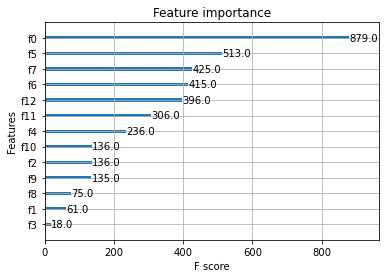

In [3]:
xgboost.plot_importance(xgb_model)
